<a href="https://colab.research.google.com/github/Nataliia-Kaguia/goit-ds-hw-05/blob/main/hw_05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Читаємо файл прямо з Google Sheets
url = "https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv&id=1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ&gid=1724592523"
df = pd.read_csv(url)


In [ ]:
# 2. Перегляд перших рядків
print(df.head())


   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [ ]:
# 3. Розмір таблиці
print("Shape:", df.shape)


Shape: (8704, 25)


In [ ]:
# 4. Типи даних
print(df.dtypes)


N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [ ]:
# 5. Частка пропусків у кожній колонці
print(df.isnull().sum() / len(df))


N                                   0.000000
Посада                              0.000000
Мова програмування                  0.442325
Спеціалізація                       0.829389
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Університет                         0.041131
Ще студент                          0.000000
Рівень англійської                  0.000000
Предметна область                   0.025620
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [ ]:
# 6. Видалення всіх колонок з пропусками, крім "Мова програмування"
cols_to_keep = ["Мова програмування"]
df_clean = df[cols_to_keep + [col for col in df.columns if col not in cols_to_keep and df[col].isnull().sum() == 0]]


In [ ]:
# 7. Перевірка пропусків
print(df_clean.isnull().sum() / len(df_clean))


Мова програмування                  0.442325
N                                   0.000000
Посада                              0.000000
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Ще студент                          0.000000
Рівень англійської                  0.000000
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64


In [ ]:
# 8. Знаходимо колонку із зарплатою автоматично
salary_col = [col for col in df.columns if "Зарплата" in col][0]
print("Колонка із зарплатою:", salary_col)


Колонка із зарплатою: Зарплата на місяць


In [ ]:
# 9. Залишаємо тільки рядки з Python та заповненою зарплатою і посадою
df_no_na = df.dropna(subset=["Мова програмування", "Посада", salary_col])
python_data = df_no_na[df_no_na["Мова програмування"] == "Python"]

print("Python shape:", python_data.shape)


Python shape: (207, 25)


count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64
Готово! Файл salary_stats.csv збережено.


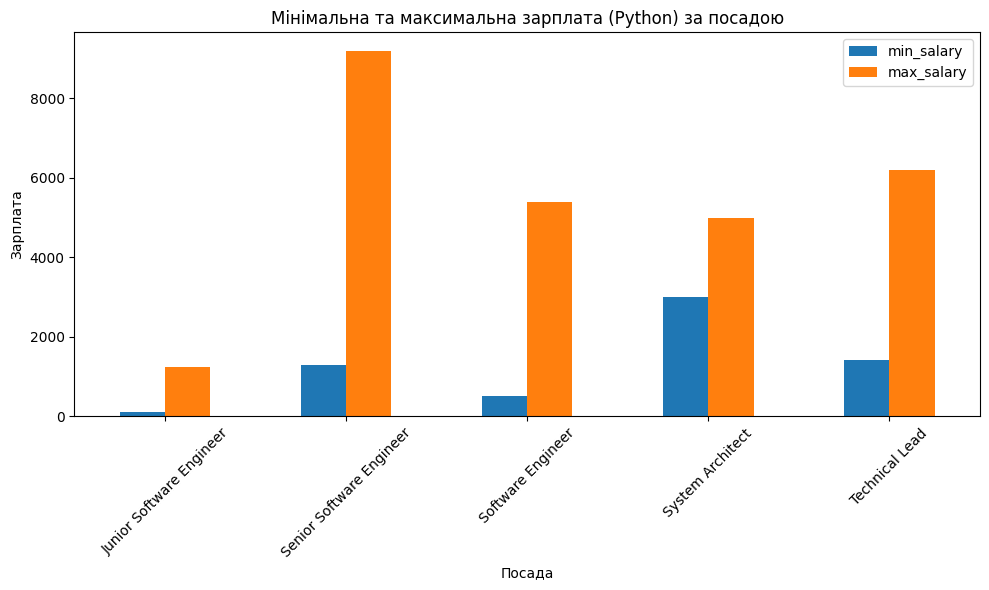

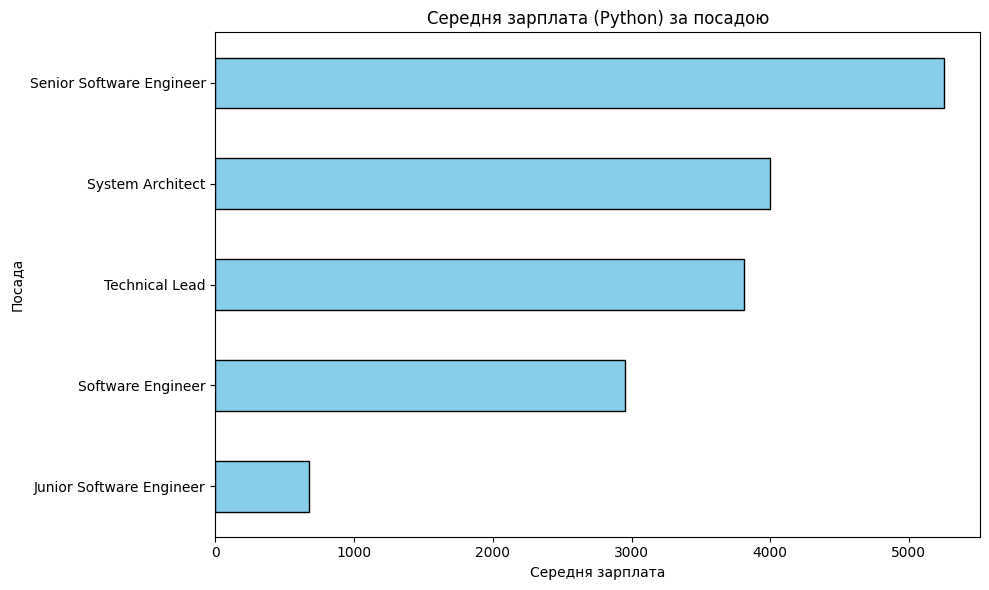

In [ ]:
# 10. Побудова статистики та графіків
if not python_data.empty:
    grouped = python_data.groupby("Посада")

    salary_stats = grouped.agg({salary_col: ["min", "max"]})
    salary_stats.columns = ["min_salary", "max_salary"]

    # середнє
    salary_stats["avg"] = (salary_stats["min_salary"] + salary_stats["max_salary"]) / 2

    # описова статистика
    print(salary_stats["avg"].describe())

    # збереження CSV
    salary_stats.to_csv("salary_stats.csv", index=True)
    print("Готово! Файл salary_stats.csv збережено.")

    # --- ГРАФІК: Мін/макс зарплата ---
    salary_stats[["min_salary", "max_salary"]].plot(kind="bar", figsize=(10, 6))
    plt.title("Мінімальна та максимальна зарплата (Python) за посадою")
    plt.ylabel("Зарплата")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # --- ГРАФІК: Середня зарплата ---
    salary_stats["avg"].sort_values().plot(kind="barh", figsize=(10, 6), color="skyblue", edgecolor="black")
    plt.title("Середня зарплата (Python) за посадою")
    plt.xlabel("Середня зарплата")
    plt.ylabel("Посада")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Немає даних для мови Python — графіки не побудовані.")
